## Classification with Neural Networks

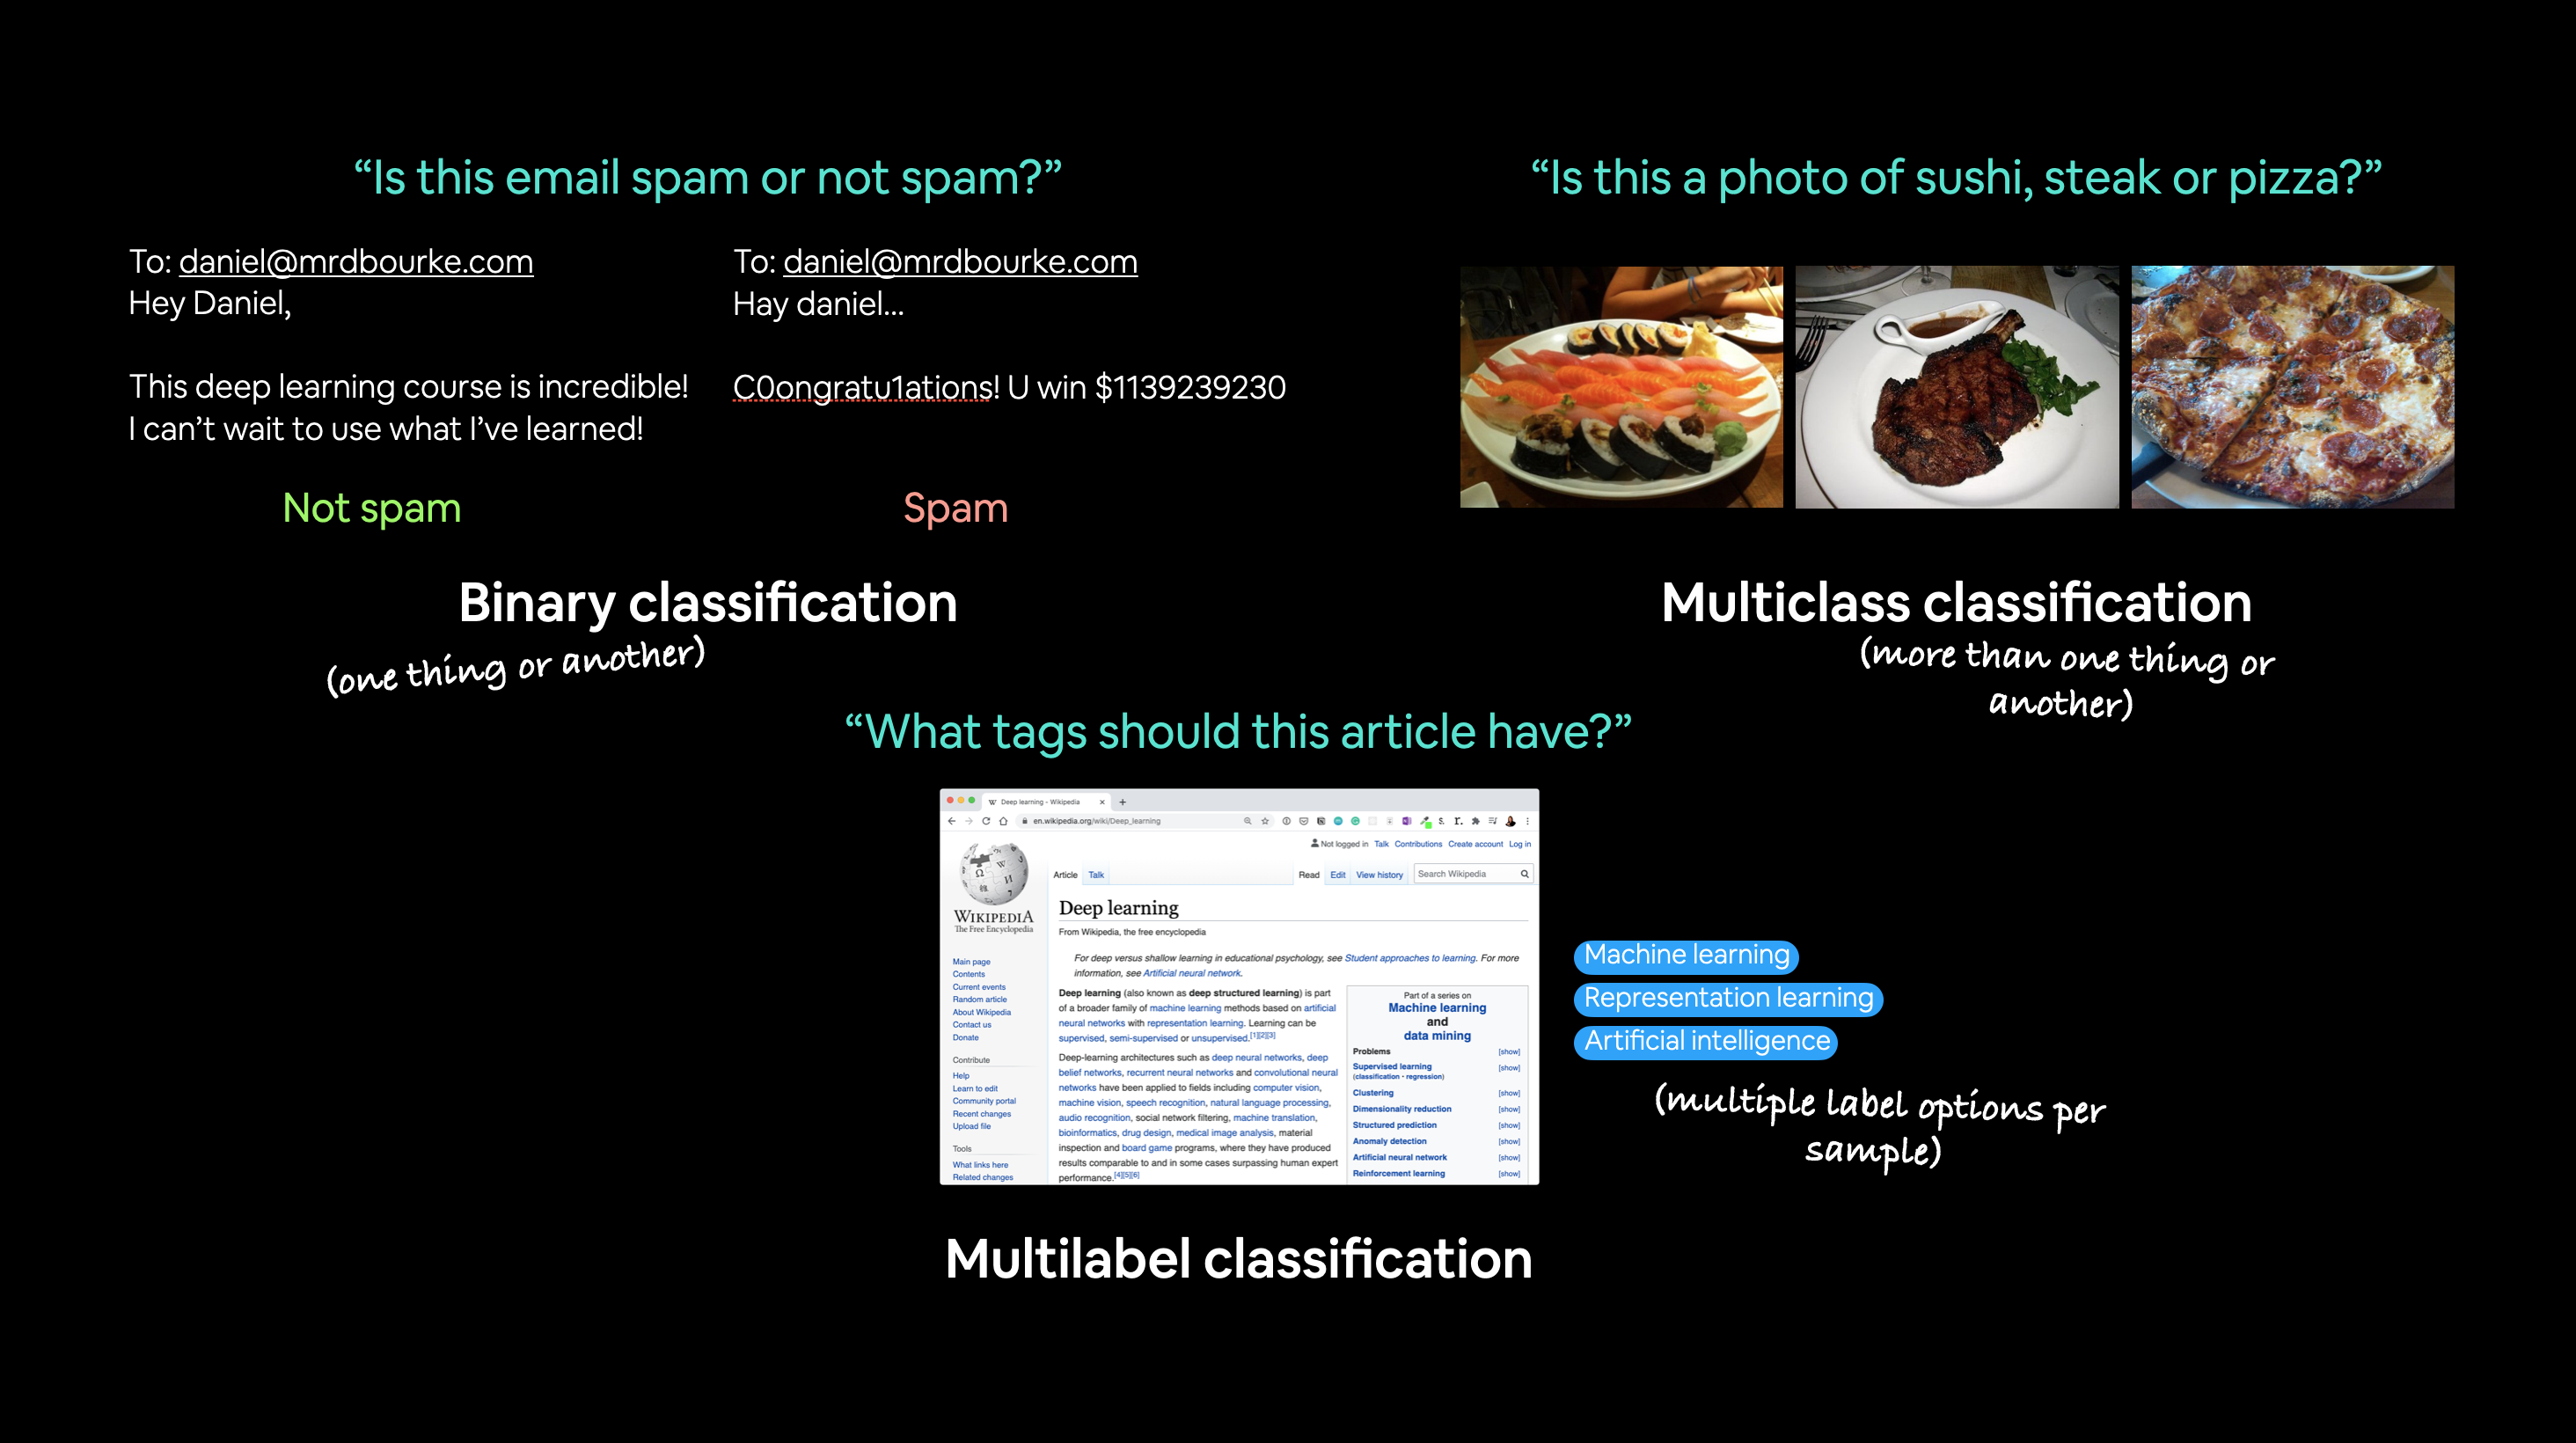

## Architecture of a Classification Neural Network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter**            | **Binary Classification**                                                                                                                                               | **Multiclass Classification**                                                                                                                                                                      |
|--------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Input layer shape** (`in_features`) | Same as number of features (e.g., 5 for age, sex, height, weight, smoking status in heart disease prediction)                                                          | Same as binary classification                                                                                                                                                                    |
| **Hidden layer(s)**            | Problem specific, minimum = 1, maximum = unlimited                                                                                                                     | Same as binary classification                                                                                                                                                                    |
| **Neurons per hidden layer**   | Problem specific, generally 10 to 512                                                                                                                                  | Same as binary classification                                                                                                                                                                    |
| **Output layer shape** (`out_features`) | 1 (one class or the other)                                                                                                                                          | 1 per class (e.g., 3 for food, person, or dog photo)                                                                                                                                              |
| **Hidden layer activation**    | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification                                                                                                                                                                    |
| **Output activation**          | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)                      | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch)                                         |
| **Loss function**              | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch)                                                              |
| **Optimizer**                  | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) ([`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification                                                                                                                                                                    |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.


<b> Making a Toy Classification Dataset </b>

In [1]:
import torch
from torch import nn

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X , y = make_circles(n_samples , noise=0.03 , random_state=42)

In [3]:
len(X) , len(y)

(1000, 1000)

In [4]:
X[:5] , y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [5]:
type(X) , X.shape , type(y) , y.shape

(numpy.ndarray, (1000, 2), numpy.ndarray, (1000,))

In [6]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [7]:
type(X) , X.dtype , type(y) , y.shape

(torch.Tensor, torch.float32, torch.Tensor, torch.Size([1000]))

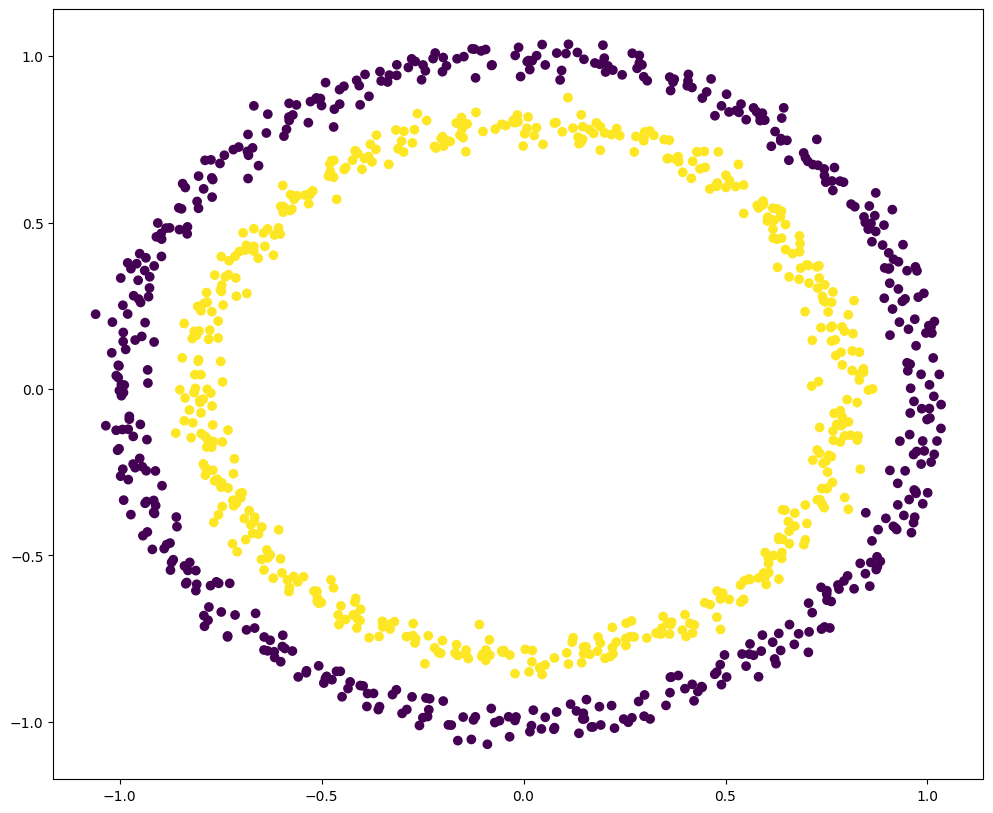

In [8]:
# import seaborn as sns

# sns.scatterplot(data=data , x='X1' , y='X2' , hue='label')

import matplotlib.pyplot as plt
plt.figure(figsize=(12 , 10))
plt.scatter(x=X[: , 0] , y=X[: , 1] , c=y)

Data we are working with is a toy dataset which is good for practicing fundamentals...

<b> Training Split </b>

In [9]:
train_split = int(0.8 * len(X))

In [10]:
train_split

800

In [11]:
X_train , y_train = X[:train_split] , y[:train_split]
X_test ,  y_test = X[train_split:] , y[train_split:]

In [12]:
X_train.shape , y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

<b> Constructing Classification Model using nn.Module </b> 

1. Subclassing `nn.Module` and Overriding `forward()`
2. Creating 2 * `nn.Linear()` computation layers that handle shape of our data.

In [13]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()

        # hidden layer which upscales it to 16 features. More the features ( under a threshold ) more the model has the chance to learn from data 
        self.layer1 = nn.Linear(in_features=2 , out_features=16) 

        # treating layer2 as output layer
        self.layer2 = nn.Linear(in_features=16 , out_features=1)
        
         # The successor layer must match the outfeatures of predecessor's layer
        

    def forward(self , X):
        return self.layer2(self.layer1(X))

<b><i> forward method's chain : </i></b>


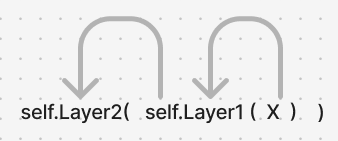

In [14]:
Model = CircleModel()

<b> Replicating the same Model with `nn.Sequential()`

In [15]:
Model = nn.Sequential(
    nn.Linear(in_features=2 , out_features=16),
    nn.Linear(in_features=16 , out_features=1) 
)

In [16]:
Model

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=1, bias=True)
)

<b> the Class `CircleModel()` can be reimplemented as </b>

In [17]:
"""
    The same Class but with `nn.Sequential` the implementation of layers of our network becomes 
    simple since it does the manual work behind the scenes
"""
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layers = nn.Sequential(
        nn.Linear(in_features=2 , out_features=16),
        nn.Linear(in_features=16 , out_features=1)
       )
        

    def forward(self , X):
        return self.linear_layers(X)

In [18]:
Model = CircleModel()

Model

CircleModel(
  (linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [19]:
Model.state_dict() # viewing weights and biases of each layer (16*2) neurons

OrderedDict([('linear_layers.0.weight',
              tensor([[-0.2274,  0.5455],
                      [-0.4664,  0.2041],
                      [-0.1612, -0.2935],
                      [-0.1859, -0.3472],
                      [-0.2795, -0.6085],
                      [ 0.0314,  0.3474],
                      [-0.6005,  0.4806],
                      [ 0.5970,  0.2154],
                      [-0.5339,  0.1078],
                      [ 0.2275, -0.4209],
                      [-0.5157,  0.0519],
                      [-0.1872,  0.4351],
                      [ 0.1641, -0.1937],
                      [-0.4093,  0.0837],
                      [ 0.3074, -0.0456],
                      [-0.4526, -0.5320]])),
             ('linear_layers.0.bias',
              tensor([ 0.0413,  0.3360,  0.2564,  0.3372,  0.6007,  0.2563, -0.3941, -0.3004,
                      -0.6498, -0.4338, -0.3956,  0.1736,  0.1278, -0.5485,  0.0372,  0.5694])),
             ('linear_layers.1.weight',
              te

In [20]:
with torch.inference_mode():
    untrained_preds = torch.round(Model(X_test))

untrained_preds[:5] , untrained_preds.shape    

(tensor([[0.],
         [0.],
         [0.],
         [-0.],
         [0.]]),
 torch.Size([200, 1]))

In [21]:
X_test[:5] , y_test[:5]

(tensor([[ 0.6197,  0.5066],
         [ 0.6471, -0.3642],
         [ 0.4187,  0.6843],
         [-0.6563, -0.4358],
         [ 0.4739,  0.8212]]),
 tensor([1., 1., 1., 1., 0.]))

In [22]:
y_test[:5] , untrained_preds[:5]

(tensor([1., 1., 1., 1., 0.]),
 tensor([[0.],
         [0.],
         [0.],
         [-0.],
         [0.]]))

<b> Setting up a Loss function and Optimizer

- Depends on the Problem : 
        For Classification `Binary Cross Entropy` or `Categorical Cross Entropy`.
        Can Use Stochastic Gradient Descent or Adam , which are common Loss Functions.
        

In [23]:
# loss_fn = nn.BCELoss() # requires the inputs to go through sigmoid activation function

loss_fn = nn.BCEWithLogitsLoss() # BCE with built-in Sigmoid activation function. Numerically stable than `BCELoss()`

Optimizer = torch.optim.SGD(params=Model.parameters() , lr=0.1)

<b> Accuracy Function as Evaluation Metric for Classification </b>

In [24]:
def accuracy_fn(y_true , y_pred):
    correct_preds = (y_true == y_pred).sum().item()
    acc = round((correct_preds / len(y_pred)) * 100)# accuracy(%)
    return acc

<b> From *Raw Logits* to *Prediction Probabilites* and Finally *Prediction Labels*... </b>

Our Initial model outputs **logits** *[ Logits are the outputs of a neural network before the activation function is applied  scores represent the model’s confidence in predicting each class. ]*

Thus we need to pass them to an Activation Function
    - E.g **Sigmoid** for Binary Cross Entropy And **Softmax** for Multiclass Classification. 

After that for Label according to Activation Function : `.round()`for Sigmoid And `.argmax()`for Softmax outputs.

In [25]:
Model.eval()
with torch.inference_mode():
    logit_preds = Model(X_test)
logit_preds[:5]

tensor([[ 0.1726],
        [ 0.1992],
        [ 0.1348],
        [-0.0147],
        [ 0.1405]])

In [26]:
y_pred_probs = torch.sigmoid(logit_preds)
y_pred_probs[:5]

tensor([[0.5430],
        [0.5496],
        [0.5337],
        [0.4963],
        [0.5351]])

In [27]:
y_pred = torch.round(y_pred_probs)
y_pred[:5]

tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.]])

Generally `label_1(0) < 0.5 < label 2 (1)` for Binary classification...

<b> Traning Loop </b>

In [28]:
epochs = 1000

for epoch in range(epochs):

    Model.train()

    logits = Model(X_train).squeeze()
    pred = torch.round(torch.sigmoid(logits))

    loss = loss_fn(logits , y_train) # BCELogitloss expects raw logits and calculates loss.
    acc = accuracy_fn(y_train , pred)

    Optimizer.zero_grad() 

    loss.backward()

    Optimizer.step()

    if epoch % 10 == 0:
        with torch.inference_mode():
            test_logit = Model(X_test).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logit))
        
        print(f"Epoch : {epoch} | Loss : {loss} | Accuracy : {acc} |Test-Loss {loss_fn(test_logit , y_test)} | Test-Accuracy : {accuracy_fn(y_test , test_pred)}")

Epoch : 0 | Loss : 0.6934822201728821 | Accuracy : 53 |Test-Loss 0.7031844854354858 | Test-Accuracy : 46
Epoch : 10 | Loss : 0.6926755309104919 | Accuracy : 53 |Test-Loss 0.701697587966919 | Test-Accuracy : 43
Epoch : 20 | Loss : 0.6925401091575623 | Accuracy : 52 |Test-Loss 0.7010324597358704 | Test-Accuracy : 40
Epoch : 30 | Loss : 0.6925052404403687 | Accuracy : 52 |Test-Loss 0.7006121277809143 | Test-Accuracy : 40
Epoch : 40 | Loss : 0.6924907565116882 | Accuracy : 52 |Test-Loss 0.7003135681152344 | Test-Accuracy : 40
Epoch : 50 | Loss : 0.692483127117157 | Accuracy : 52 |Test-Loss 0.7000934481620789 | Test-Accuracy : 40
Epoch : 60 | Loss : 0.6924787759780884 | Accuracy : 52 |Test-Loss 0.6999290585517883 | Test-Accuracy : 40
Epoch : 70 | Loss : 0.6924762725830078 | Accuracy : 53 |Test-Loss 0.6998052000999451 | Test-Accuracy : 40
Epoch : 80 | Loss : 0.6924748420715332 | Accuracy : 53 |Test-Loss 0.6997117400169373 | Test-Accuracy : 41
Epoch : 90 | Loss : 0.6924740076065063 | Accuracy

<b> Looking like Our Model doesn't learn anything , Checking the visualization of Predictions

In [29]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


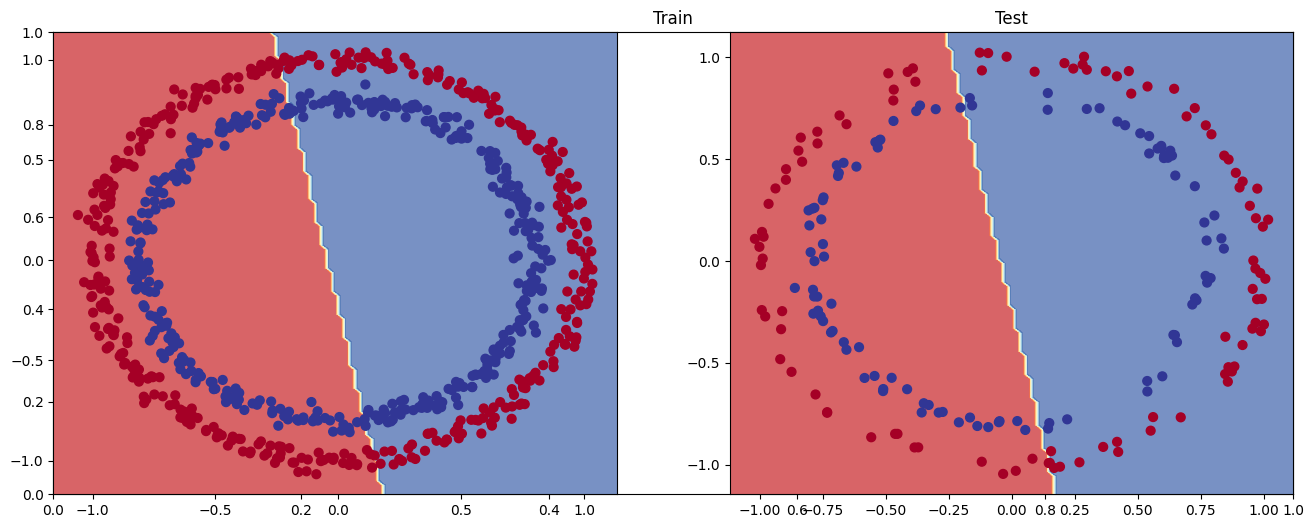

In [30]:
plt.figure(figsize=(16 , 6))
plt.title("Train")
plt.subplot(1 , 2 , 1)
plot_decision_boundary(Model , X_train , y_train)
plt.subplot(1 , 2 , 2)
plt.title("Test")
plot_decision_boundary(Model , X_test , y_test)

Model here tries to make a straight line out of this data and is unsuccessful doing so after a 1000 epochs.

In [31]:
Model.state_dict()

OrderedDict([('linear_layers.0.weight',
              tensor([[-0.2283,  0.5461],
                      [-0.4693,  0.2060],
                      [-0.1625, -0.2927],
                      [-0.1841, -0.3483],
                      [-0.2826, -0.6065],
                      [ 0.0296,  0.3486],
                      [-0.5986,  0.4794],
                      [ 0.5974,  0.2151],
                      [-0.5304,  0.1055],
                      [ 0.2259, -0.4198],
                      [-0.5120,  0.0496],
                      [-0.1845,  0.4333],
                      [ 0.1683, -0.1965],
                      [-0.4132,  0.0863],
                      [ 0.3084, -0.0462],
                      [-0.4483, -0.5348]])),
             ('linear_layers.0.bias',
              tensor([ 0.0405,  0.3333,  0.2550,  0.3389,  0.5977,  0.2546, -0.3922, -0.3001,
                      -0.6463, -0.4354, -0.3920,  0.1763,  0.1318, -0.5520,  0.0381,  0.5735])),
             ('linear_layers.1.weight',
              te

<b> Improving a Model </b>

* An option is to add more layers that give our model chances to learn about patterns in data.
* Add more computation neurons in hidden layers
* Train for more Epochs
* Changing the Learning Rate

In [32]:
class CircleModelV2(nn.Module):
   def __init__(self):
      super().__init__()

      
      self.layer_1 = nn.Linear(in_features=2 , out_features=32) # double the previous version
      self.layer_2 = nn.Linear(in_features=32 , out_features=32)
      # Addtion of a third layer
      self.layer_3 = nn.Linear(in_features=32 , out_features=1)

   
   def forward(self , X: torch.tensor):
      return self.layer_3(self.layer_2(self.layer_1(X)))
      

In [33]:
Model = CircleModelV2()

In [34]:
Model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-6.1560e-01,  3.9482e-01],
                      [ 8.7815e-02,  4.2114e-01],
                      [-1.5362e-01, -3.4984e-02],
                      [ 2.6684e-01, -5.3512e-01],
                      [ 5.2263e-01,  6.2655e-01],
                      [-9.9659e-02, -5.7575e-01],
                      [-1.8857e-03,  4.5621e-04],
                      [ 3.0558e-01, -6.9284e-01],
                      [-5.5850e-01, -4.3216e-01],
                      [ 5.2177e-01, -5.9937e-02],
                      [-3.7015e-02, -5.5228e-01],
                      [ 7.2972e-02,  1.3149e-01],
                      [ 4.2186e-01,  8.7208e-02],
                      [ 6.4260e-01, -6.0358e-01],
                      [ 6.6911e-01,  5.6831e-01],
                      [-4.5693e-01,  5.4617e-01],
                      [ 6.5599e-01, -5.2566e-01],
                      [-6.9715e-01,  2.2543e-01],
                      [-4.6343e-01,  4.3783e-01],
                  

In [35]:
loss_fn = nn.BCEWithLogitsLoss()

Optimizer = torch.optim.SGD(params=Model.parameters() , lr=0.05)

In [36]:
epochs = 1000

for epoch in range(epochs):

    Model.train()

    logits = Model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(logits))

    loss = loss_fn(logits , y_train)
    acc = accuracy_fn(y_train , y_pred)

    Optimizer.zero_grad()

    loss.backward()

    Optimizer.step()

    if epoch % 100 == 0:
        Model.eval()
        with torch.inference_mode():
            test_logits = Model(X_test).squeeze()
            test_preds = torch.round(torch.sigmoid(test_logit))
            test_loss = loss_fn(test_logits , y_test)
            test_acc = accuracy_fn(y_test , test_preds)

        print(f"Epoch : {epoch} | Loss : {loss} | Accuracy : {acc} |Test-Loss {test_loss} | Test-Accuracy : {test_acc}")
    

Epoch : 0 | Loss : 0.697024405002594 | Accuracy : 50 |Test-Loss 0.689871609210968 | Test-Accuracy : 41
Epoch : 100 | Loss : 0.6925923228263855 | Accuracy : 52 |Test-Loss 0.6968081593513489 | Test-Accuracy : 41
Epoch : 200 | Loss : 0.6924774050712585 | Accuracy : 53 |Test-Loss 0.6988547444343567 | Test-Accuracy : 41
Epoch : 300 | Loss : 0.6924730539321899 | Accuracy : 53 |Test-Loss 0.6992906928062439 | Test-Accuracy : 41
Epoch : 400 | Loss : 0.6924727559089661 | Accuracy : 53 |Test-Loss 0.699387788772583 | Test-Accuracy : 41
Epoch : 500 | Loss : 0.6924727559089661 | Accuracy : 53 |Test-Loss 0.699411153793335 | Test-Accuracy : 41
Epoch : 600 | Loss : 0.6924728155136108 | Accuracy : 53 |Test-Loss 0.6994171142578125 | Test-Accuracy : 41
Epoch : 700 | Loss : 0.6924728155136108 | Accuracy : 53 |Test-Loss 0.6994187235832214 | Test-Accuracy : 41
Epoch : 800 | Loss : 0.6924728155136108 | Accuracy : 53 |Test-Loss 0.6994190812110901 | Test-Accuracy : 41
Epoch : 900 | Loss : 0.6924729347229004 | A

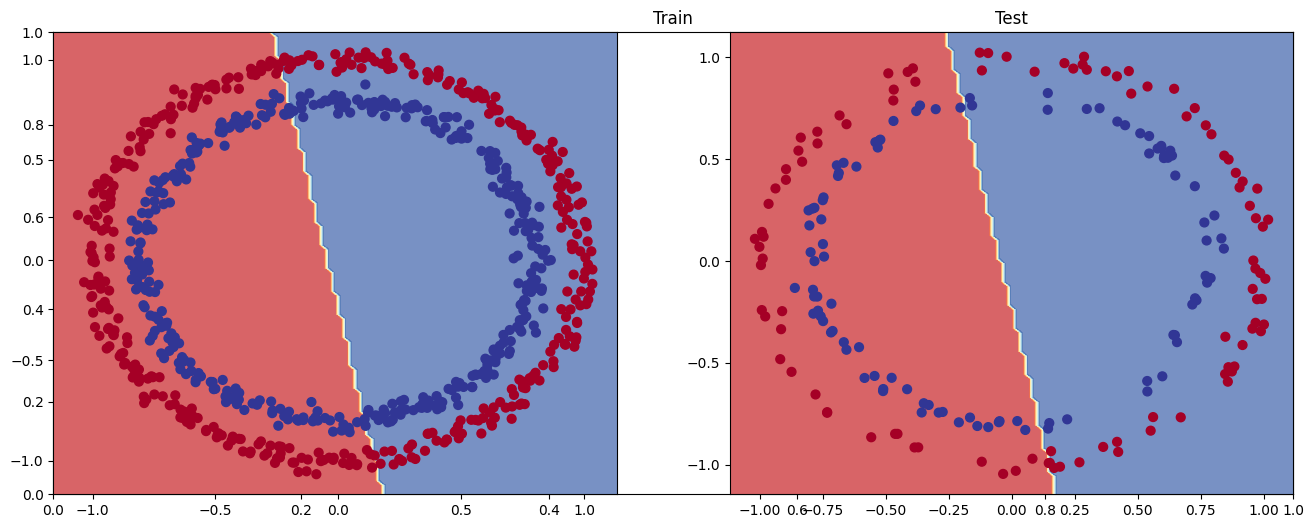

In [37]:
plt.figure(figsize=(16 , 6))
plt.title("Train")
plt.subplot(1 , 2 , 1)
plot_decision_boundary(Model , X_train , y_train)
plt.subplot(1 , 2 , 2)
plt.title("Test")
plot_decision_boundary(Model , X_test , y_test)

Preparing data to see if our model can fit a straight line

In [38]:
weight = 0.7 
bias = 0.3

X_reg = torch.arange(0 , 1 , 0.01).unsqueeze(dim=1)
y_reg = (weight * X_reg) + bias

In [39]:
X_reg[:5] , y_reg[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [40]:
train_split = int(0.8 * len(X_reg))
X_reg_train , y_reg_train = X_reg[:train_split] , y_reg[:train_split]
X_reg_test , y_reg_test = X_reg[train_split:] , y_reg[train_split:]

In [41]:
train_split

80

In [42]:
len(X_reg_train) , len(X_reg_test) , len(y_reg_train) , len(y_reg_test)

(80, 20, 80, 20)

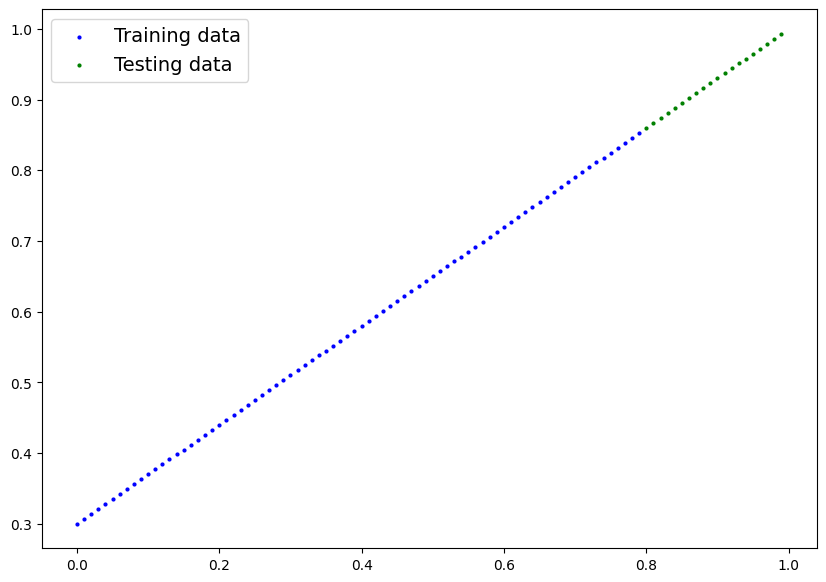

In [43]:
plot_predictions(X_reg_train , y_reg_train , X_reg_test , y_reg_test)

updating model for fitting it to a straight line ( Regression Task )

In [44]:
Model = nn.Sequential(
    nn.Linear(in_features=1 , out_features=32),
    nn.Linear(in_features=32 , out_features=32),
    nn.Linear(in_features=32 , out_features=1)
)

Model

Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): Linear(in_features=32, out_features=32, bias=True)
  (2): Linear(in_features=32, out_features=1, bias=True)
)

In [45]:
loss_fn = nn.L1Loss()
Optimizer = torch.optim.SGD(params=Model.parameters() , lr=0.1)

In [46]:
epochs = 1000

for epoch in range(epochs):
    Model.train()

    pred = Model(X_reg_train)

    loss = loss_fn(pred , y_reg_train)

    Optimizer.zero_grad()

    loss.backward()

    Optimizer.step()

    if epoch % 100 == 0:
        Model.eval()
        with torch.inference_mode():
            test_pred = Model(X_reg_test)
            test_loss = loss_fn(test_pred , y_reg_test)

        print(f"Epoch : {epoch} | Loss : {loss:.5f} | Test Loss : {test_loss:.5f}")


Epoch : 0 | Loss : 0.51246 | Test Loss : 0.07406
Epoch : 100 | Loss : 0.11094 | Test Loss : 0.13910
Epoch : 200 | Loss : 0.10055 | Test Loss : 0.12634
Epoch : 300 | Loss : 0.06267 | Test Loss : 0.14478
Epoch : 400 | Loss : 0.04823 | Test Loss : 0.08960
Epoch : 500 | Loss : 0.07814 | Test Loss : 0.13138
Epoch : 600 | Loss : 0.05157 | Test Loss : 0.12287
Epoch : 700 | Loss : 0.08493 | Test Loss : 0.06069
Epoch : 800 | Loss : 0.07080 | Test Loss : 0.10079
Epoch : 900 | Loss : 0.07572 | Test Loss : 0.03669


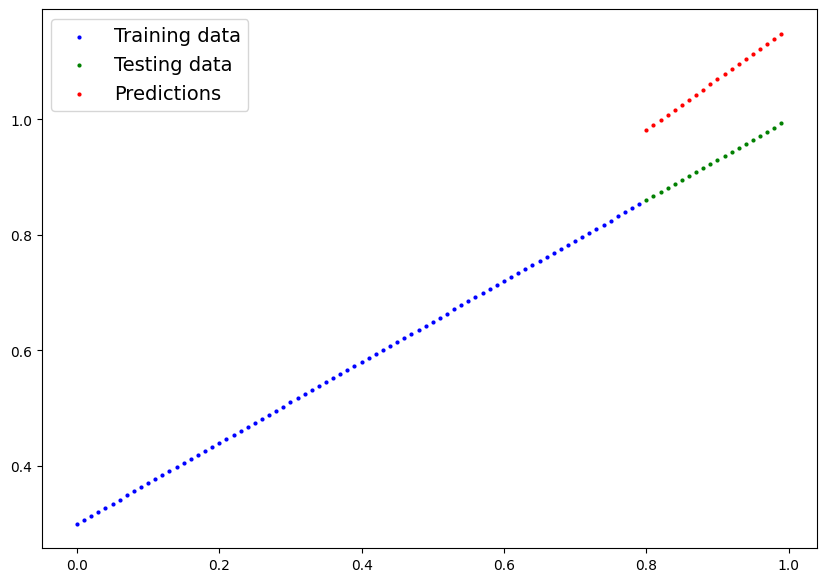

In [47]:
Model.eval()

with torch.inference_mode():
    preds = Model(X_reg_test)

plot_predictions(X_reg_train , y_reg_train , X_reg_test , y_reg_test , preds)

Thus our model has capacity to learn ( with adding layers , changing optimizers etc.)

<b> Missing Piece is Non-Linearity </b>

Neural Networks have power to draw Patterns form Linear and Non-Linear data and that makes them powerful to do things like automate a task like Driving.

<b> Recreating Non-Linear Data </b>

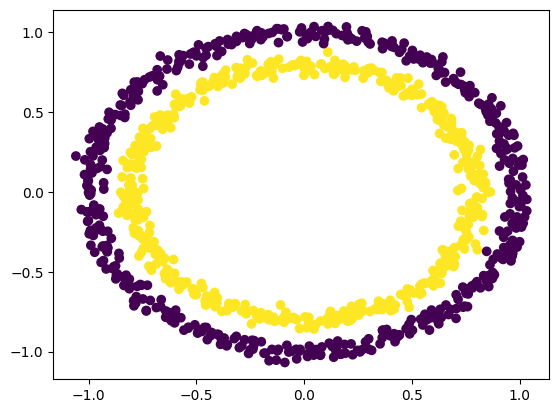

In [48]:
n_samples = 1000

X , y = make_circles(n_samples , noise=0.03 , random_state=42)

plt.scatter(X[: , 0] ,  X[: , 1] , c=y)

In [49]:
from sklearn.model_selection import train_test_split


X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [50]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

<b> Building a Model capable of Non-Linear Calculation </b>

In [51]:
class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2 , out_features=16)
        self.layer_2 = nn.Linear(in_features=16 , out_features=16)
        self.layer_3 = nn.Linear(in_features=16 , out_features=16)
        self.layer_4 = nn.Linear(in_features=16 , out_features=1)
        self.relu = nn.ReLU() #[ Rectified Linear Unit ] a Non-Linear Activation Function / Can use Sigmoid fn. too.

    def forward(self , X:torch.tensor):
        return self.layer_4(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X))))))

Model = CircleModelV3()

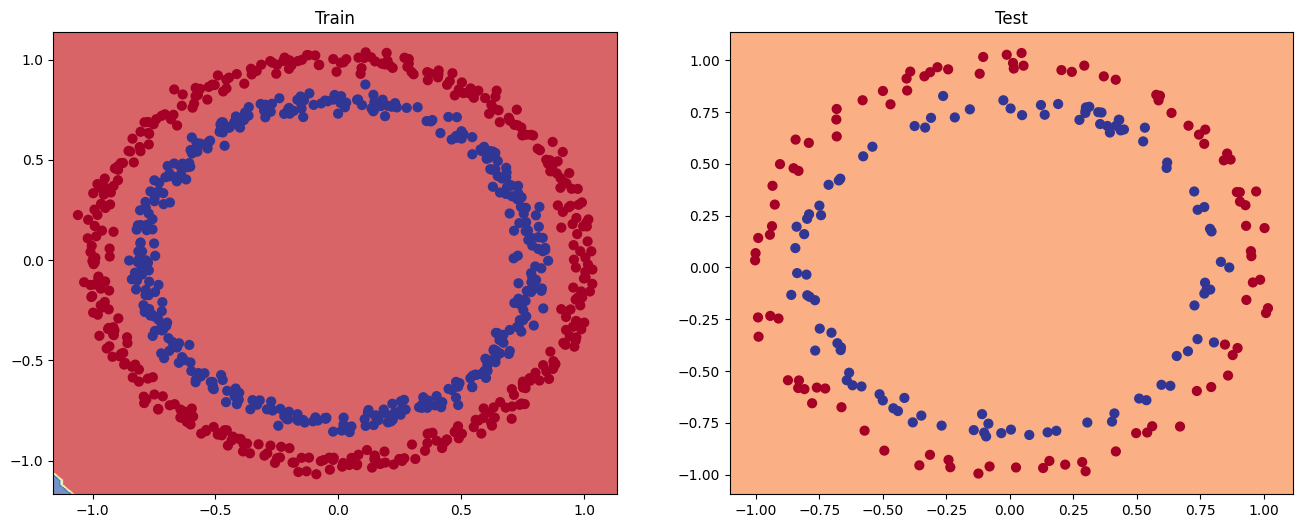

In [52]:
plt.figure(figsize=(16 , 6))
plt.subplot(1 , 2 , 1)
plt.title("Train")
plot_decision_boundary(Model , X_train , y_train)
plt.subplot(1 , 2 , 2)
plt.title("Test")
plot_decision_boundary(Model , X_test , y_test)

In [53]:
Model

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=16, bias=True)
  (layer_4): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [54]:
Model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3557,  0.6699],
                      [ 0.2678,  0.2827],
                      [-0.6732,  0.5710],
                      [ 0.5077, -0.2245],
                      [ 0.2881,  0.6881],
                      [ 0.5394,  0.4004],
                      [-0.3563, -0.2160],
                      [-0.5389, -0.4250],
                      [-0.6857, -0.3920],
                      [-0.6237,  0.6841],
                      [-0.1469, -0.3832],
                      [-0.2686, -0.4156],
                      [-0.0117, -0.6505],
                      [ 0.3342, -0.1886],
                      [-0.2574, -0.2319],
                      [ 0.1280,  0.1582]])),
             ('layer_1.bias',
              tensor([-0.1328,  0.6493,  0.0426,  0.4480, -0.5721,  0.3610,  0.1039,  0.3451,
                      -0.0772,  0.5749, -0.0146, -0.5404, -0.3867, -0.5758,  0.6846,  0.3721])),
             ('layer_2.weight',
              tensor([[-0.0297, -0.0371,

In [55]:
loss_fn = nn.BCEWithLogitsLoss()
Optimizer = torch.optim.SGD(params=Model.parameters() , lr=0.1)

In [56]:
epochs = 1000

for epoch in range(epochs):

    Model.train()

    init_logits= Model(X_train).squeeze()

    loss = loss_fn(init_logits , y_train)
    acc = accuracy_fn(y_train , torch.round(torch.sigmoid(init_logits)))

    Optimizer.zero_grad()

    loss.backward()

    Optimizer.step()


    if epoch % 100 == 0:
        Model.eval()
        with torch.inference_mode():
            test_logits = Model(X_test).squeeze()
            test_loss = loss_fn(test_logits , y_test)
            test_acc = accuracy_fn(y_test , torch.round(torch.sigmoid(test_logits)))

        print(f"Epoch : {epoch} | Loss : {loss} | Accuracy : {acc} |Test-Loss {test_loss} | Test-Accuracy : {test_acc}")


Epoch : 0 | Loss : 0.6944947838783264 | Accuracy : 50 |Test-Loss 0.6939926743507385 | Test-Accuracy : 50
Epoch : 100 | Loss : 0.6916634440422058 | Accuracy : 54 |Test-Loss 0.6922328472137451 | Test-Accuracy : 52
Epoch : 200 | Loss : 0.6893603801727295 | Accuracy : 57 |Test-Loss 0.6908003091812134 | Test-Accuracy : 54
Epoch : 300 | Loss : 0.6858518719673157 | Accuracy : 56 |Test-Loss 0.688437283039093 | Test-Accuracy : 55
Epoch : 400 | Loss : 0.6786088347434998 | Accuracy : 60 |Test-Loss 0.6831396222114563 | Test-Accuracy : 59
Epoch : 500 | Loss : 0.6579952239990234 | Accuracy : 74 |Test-Loss 0.6669921278953552 | Test-Accuracy : 68
Epoch : 600 | Loss : 0.5817925333976746 | Accuracy : 95 |Test-Loss 0.6017892360687256 | Test-Accuracy : 90
Epoch : 700 | Loss : 0.49964532256126404 | Accuracy : 66 |Test-Loss 0.5549708604812622 | Test-Accuracy : 55
Epoch : 800 | Loss : 0.3652729094028473 | Accuracy : 81 |Test-Loss 0.4063247740268707 | Test-Accuracy : 76
Epoch : 900 | Loss : 0.0746968761086463

In [57]:
Model.eval()
with torch.inference_mode():
        y_preds = torch.round(torch.sigmoid(Model(X_test))).squeeze()

y_preds[:10] , y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

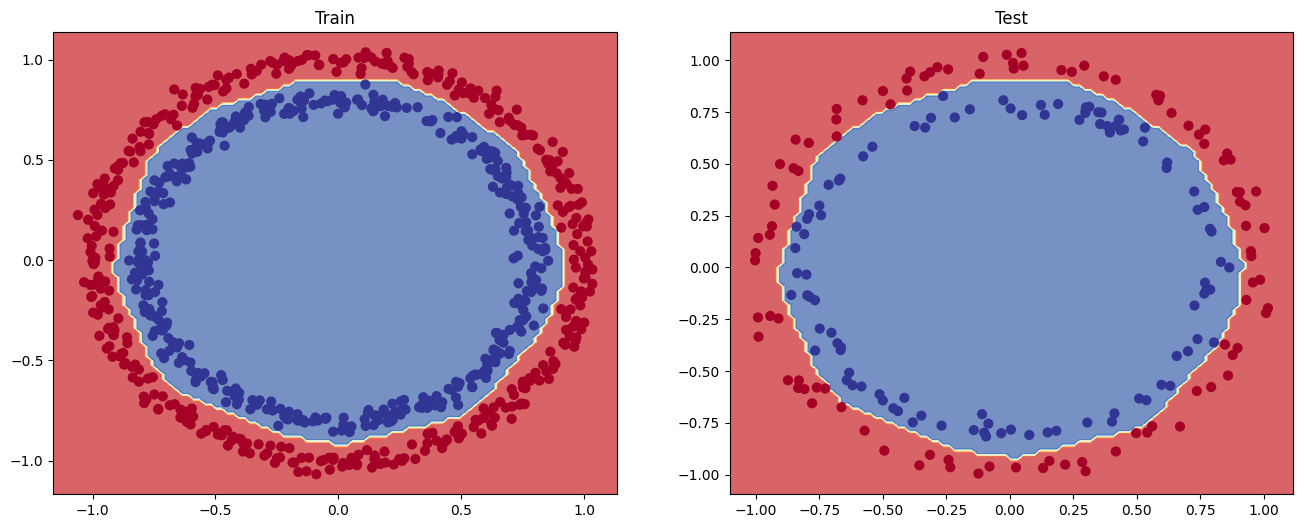

In [58]:
plt.figure(figsize=(16 , 6))
plt.subplot(1 , 2 , 1)
plt.title("Train")
plot_decision_boundary(Model , X_train , y_train)
plt.subplot(1 , 2 , 2)
plt.title("Test")
plot_decision_boundary(Model , X_test , y_test)

<b> Implementing some Activation Functions </b>

In [60]:
A = torch.arange(-10 , 10 , 1 , dtype=torch.float32)

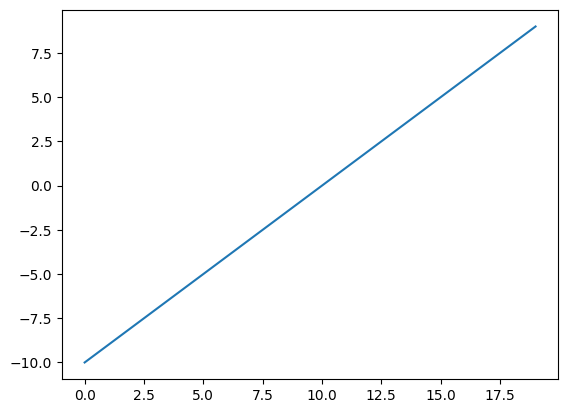

In [61]:
plt.plot(A)

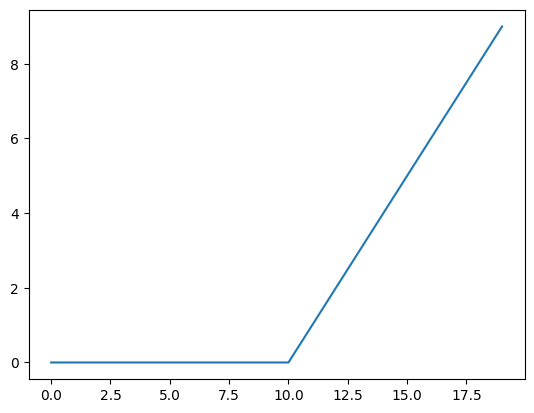

In [63]:
plt.plot(torch.relu(A))

In [65]:
def custom_relu(X : torch.Tensor) -> torch.Tensor :
    return torch.maximum(torch.tensor(0) , X)

In [66]:
custom_relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

Above proves that ReLU punishes the -ve prediction scores of Model

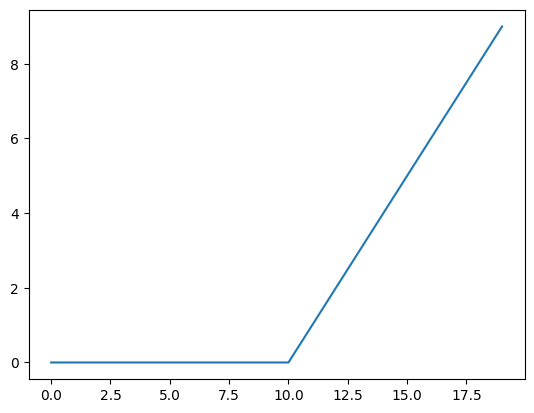

In [67]:
plt.plot(custom_relu(A)) # Same graph as built-in ReLU function

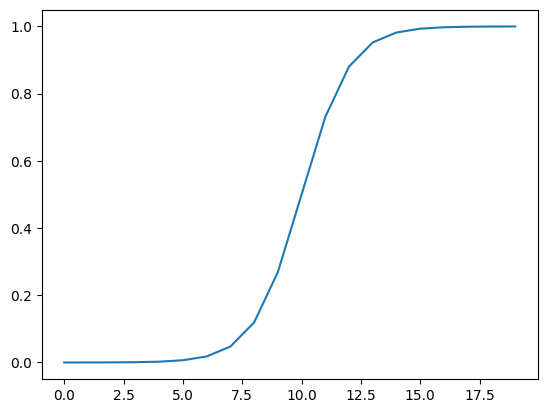

In [72]:
plt.plot(torch.sigmoid(A)) # Same graph.

In [69]:
def custom_sigmoid(X: torch.Tensor) -> torch.Tensor:
    return 1 / (1+torch.exp(-X))

In [70]:
custom_sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

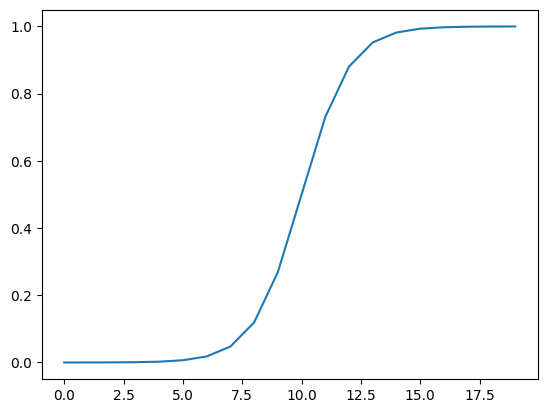

In [71]:
plt.plot(custom_sigmoid(A)) # same as built-in sigmoid function.

<b> Performing a Multiclass Classification. </b>

In [74]:
from sklearn.datasets import make_blobs

In [75]:
# Setting up some hyper parameters
NUM_CLASSES = 4
NUM_FEATURES = 2

<b> Creating a multiclass data

In [80]:
X_blob , y_blob = make_blobs(n_samples=1000 , 
                             n_features=NUM_FEATURES , 
                             centers=NUM_CLASSES , 
                             random_state=42,
                             cluster_std=1.5)

In [81]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

In [82]:
X_blob_train , X_blob_test , y_blob_train , y_blob_test = train_test_split(X_blob , y_blob , random_state=42 , test_size=0.2)

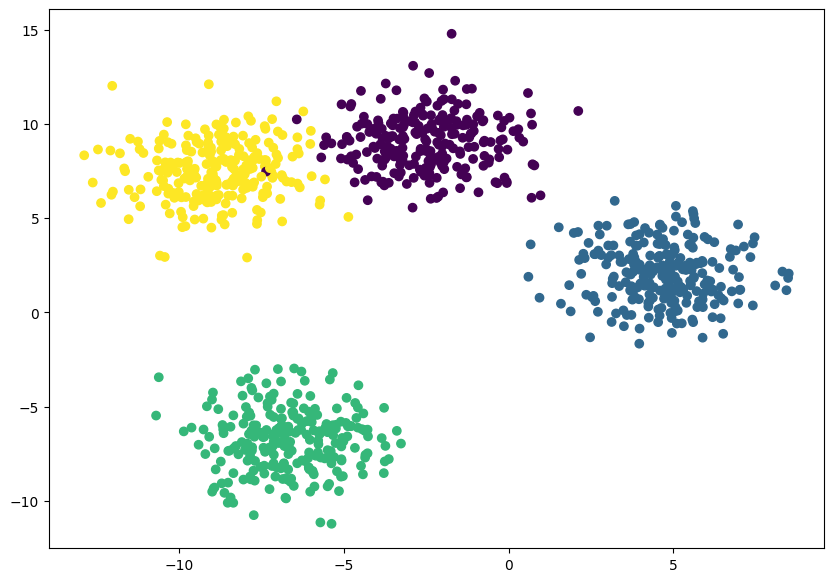

In [83]:
plt.figure(figsize=(10 , 7))
plt.scatter(X_blob[: , 0] , X_blob[: , 1] , c=y_blob)

<b> Building a Multi-Class Classification Model </b>

In [85]:
""" Args. of the BlobModel Instance : 
        1. Input Featues = No. of Features 
        2. Output Features = No. of Output Featues ( output classes )
        3. Hidden Units = Number of Hidden units between Input and Output 
        layers ( default is 8).
"""
class BlobModel(nn.Module):
    def __init__(self , input_features , output_features , hidden_units=8):
        super().__init__()

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features , out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units , out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units , out_features=output_features),
        )

    def forward(self , X:torch.Tensor) -> torch.Tensor:
        return self.linear_layer_stack(X)

In [86]:
Model = BlobModel(input_features=2 , output_features=4)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
Optimizer = torch.optim.SGD(params=Model.parameters() , lr=0.1)